In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")
from utility.ar1 import AR1
from utility.hmm1 import HMM1
from utility.ar import AR
from utility.hmmar1 import HMMAR1

In [2]:
phi = 0.99
s = 1
v = s * (1 - phi**2)
w = s
hmm_sim = HMM1(phi, v, w_var=w)

<AxesSubplot: >

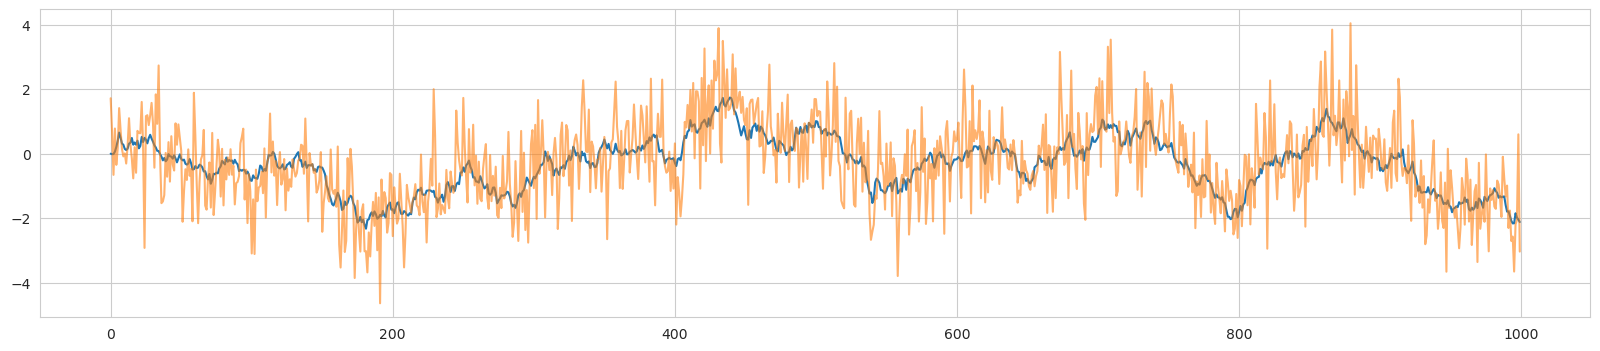

In [3]:
np.random.seed(23502938)
df = hmm_sim.simulate(0, 1000)
df['xs'].plot(figsize=(20, 4))
df['ys'].plot(alpha=0.6)

In [4]:
hmm_model = HMMAR1(0, s)

In [5]:
para = HMMAR1.Parameter(phi, v, w)
for y in df['ys']:
    hmm_model.filter(y, para)

<AxesSubplot: >

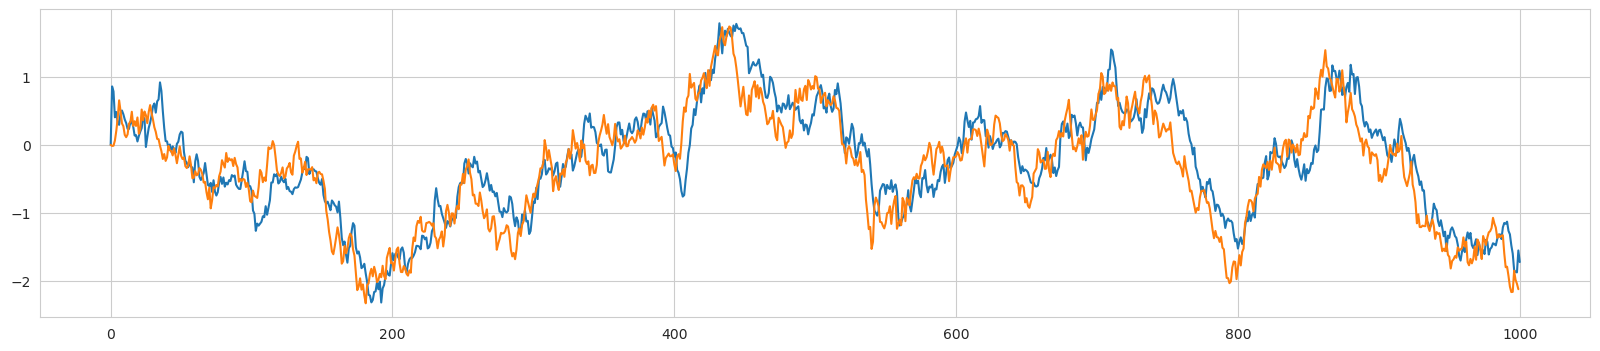

In [6]:
pd.DataFrame(hmm_model.states)['mean'].plot(figsize=(20, 4))
df['xs'].plot()

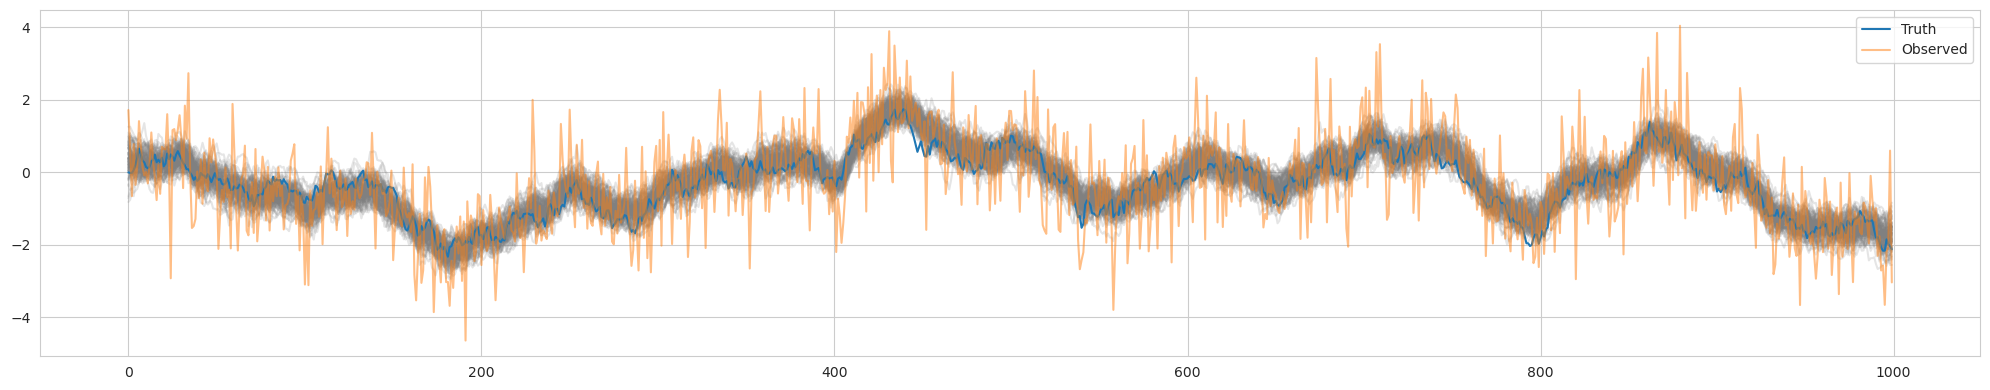

In [8]:
fig, ax = plt.subplots(figsize=(20, 4))

for i in range(100):
    hmm_model.sample_trace(para).plot(alpha=0.2, color='grey')

df['xs'].plot(label='Truth')
df['ys'].plot(label='Observed', alpha=0.5)

ax.legend()
fig.tight_layout()
fig.show()